# Real Estate Price Prediction in King County

The purpose of this project is to predict real estate price on a home in King County, Washington State, USA based on several independent variables using Multivariate Linear Regression.  Before analysis, we must recognize that the data is collected between May 2014 and May 2015.  Therefore, the data is not updated to most recent data, thus may not being accurate.  However, we may perform assumptions based on the given data set to predict a home's price.  

We will use multivariate linear regression algorithm to predict a home's potential price within King County.  Overall, we will examine the following items during the regression analysis:

1) Does the set of independent variables accurately describe the dependent variable?

2) Which variables prove significant predictors of the dependent variable and what way do they impact the dependent variable?

The basic process is as follows throughout fitting a linear line through the data points:

1) Analyzing correlation and directionality of the data

2) Estimating the model by fitting the line

3) Evaluating the validity and usefulness of the model

### Data

The dataset contains 21,613 observations and 20 unique features.

The description of the 20 unique features are as follows:

* id :- It is the unique numeric number assigned to each house being sold.

* date :- It is the date on which the house was sold out.

* price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.

* bedrooms :- It determines number of bedrooms in a house.

* bathrooms :- It determines number of bathrooms in a bedroom of a house.

* sqftliving :- It is the measurement variable which determines the measurement of house in square foot. 

* sqftlot : It is also the measurement variable which determines square foot of the lot.

* floors: It determines total floors means levels of house.

* waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.

* view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.

* condition : It determines the overall condition of a house on a scale of 1 to 5.

* grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11

* sqftabove : It determines square footage of house apart from basement. 

* sqftbasement : It determines square footage of the basement of the house.

* yrbuilt : It detrmines the date of building of the house. 

* yrrenovated : It detrmines year of renovation of house.

* zipcode : It determines the zipcode of the location of the house.

* lat : It determines the latitude of the location of the house.

* long : It determines the longitude of the location of the house.

* sqftliving15 : Living room area in 2015(implies-- some renovations) 

* sqftlot15 : lotSize area in 2015(implies-- some renovations)

In [1]:
# Start with importing the necessary libraries for analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

# Import the regression machine learning module from sklearn and train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

from time import time # This will be useful for the date field within the dataset

In [2]:
# Load the data from a .csv in the folder and assign into dataframe
df = pd.read_csv('/Users/nathanrosel/Downloads/Projects/KingCounty/kingcountyhomes.csv')

In [3]:
# Viewing info about the dataset and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
# Looking at the unique columns in the data set
for col in df.columns:
    print(col)


id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15


In [5]:
# Looking at the summary statistics in the dataframe
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# How many null values are there in each column?

df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Next, we will utilize distribution plots to check for any outliers within the data set

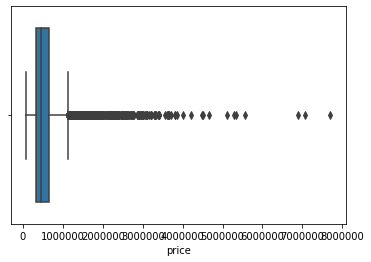

In [7]:
# This first is a boxplot for the price variable
sns.boxplot(x = df.columns[2], data = df) 

In [8]:
# To have whole number integers for the bathrooms, we will round the integers
df.bathrooms = round(df.bathrooms)

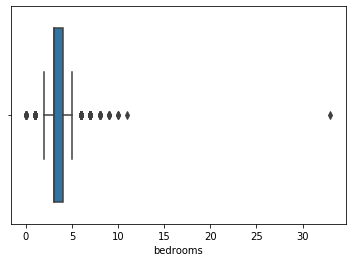

In [9]:
# boxplot of bedrooms
sns.boxplot(x = df.columns[3], data = df)

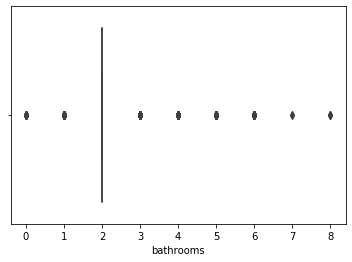

In [10]:
# Boxplot for bathroom
sns.boxplot(x = df.columns[4], data = df)

In [11]:
# How many bathrooms of each room do we have?

df.bathrooms.value_counts()

2.0    13851
1.0     3933
3.0     2527
4.0     1201
5.0       57
6.0       24
0.0       14
8.0        4
7.0        2
Name: bathrooms, dtype: int64

As we can see, most homes have 2 bathrooms

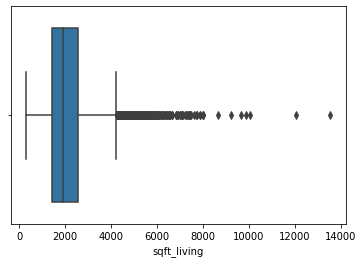

In [12]:
# Boxplot for sqft_living
sns.boxplot(x = df.columns[5], data = df)

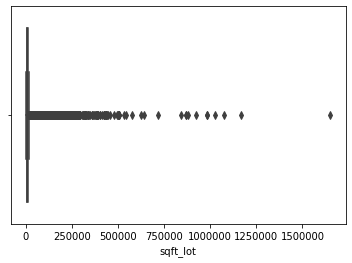

In [13]:
# Boxplot for sqft_lot
sns.boxplot(x = df.columns[6], data = df)

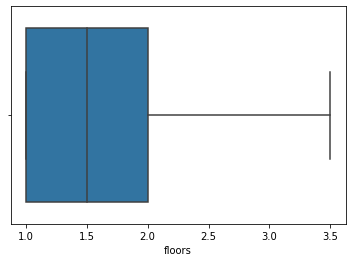

In [14]:
# Boxplot for floors
sns.boxplot(x = df.columns[7], data = df)

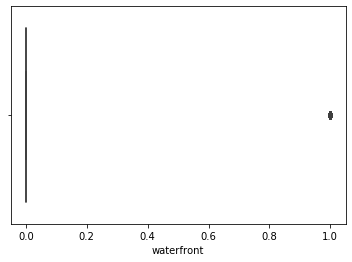

In [15]:
# Boxplot for waterfront homes
sns.boxplot(x = df.columns[8], data = df)

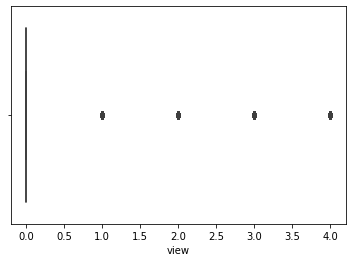

In [16]:
# Boxplot for homes that have views
sns.boxplot(x = df.columns[9], data = df)

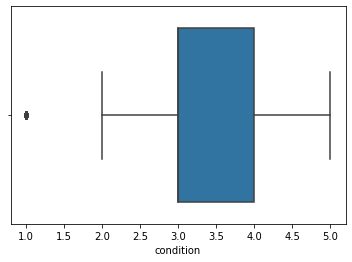

In [17]:
# Boxplot for the condition scores of the homes
sns.boxplot(x = df.columns[10], data = df)

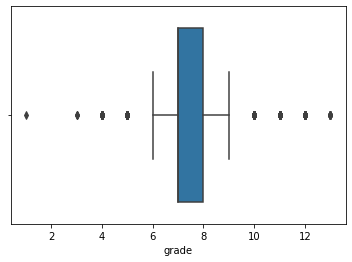

In [18]:
# Boxplot for the grades of the homes
sns.boxplot(x = df.columns[11], data = df)

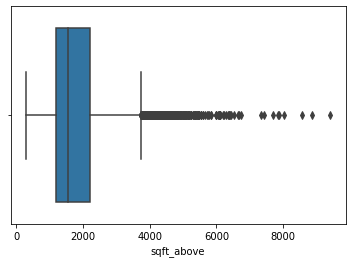

In [19]:
# Boxplot for sqft_above
sns.boxplot(x = df.columns[12], data = df)

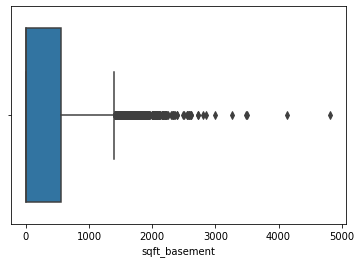

In [20]:
# Boxplot for sqft_basement
sns.boxplot(x = df.columns[13], data = df)

Given the significantly large datasize, we may comfortably remove all significant outliers from the dataset.  After removing the outliers, we may still assume a normalized dataset.

In [21]:
# Function to remove outliers

columns = ['bedrooms','bathrooms','sqft_living', 'sqft_lot', 'floors','condition','grade',
           'sqft_above','sqft_basement', 'yr_built', 'zipcode','lat','long','sqft_living15','sqft_lot15']

for col in columns:
    df_mean, df_std = np.mean(df[col]), np.std(df[col])
    cut_off = df_std * 3
    lower, upper = df_mean - cut_off, df_mean + cut_off
    df = df[df[col] >= lower]
    df = df[df[col] <= upper]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.0,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.0,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,1.0,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.0,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [22]:
# How many bathrooms are there after rounding the integers

df.bathrooms.value_counts()

2.0    13022
1.0     3771
3.0     2086
4.0      685
0.0        5
Name: bathrooms, dtype: int64

In [23]:
# Next, we will clean the date column by trimming "T000000" from the ends of each data point
#df['date'] = df['date'].map(lambda x: x.rstrip('T000000'))
df['date']=[x[:8] for x in df['date']]
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.0,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.0,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,1.0,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.0,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [24]:
# Now, we will change the data points in the date column to the appropriate format
df['date']=pd.to_datetime(df["date"])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.0,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.0,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,1.0,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.0,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Data Analysis

insert analysis points here....

To have a general understanding of the general statistics of the prices, we will calculate the count, mean, standard deviation, minimum, and maximum.  We will round them to three decimal places.

In [25]:
df['price'].describe().round(3)

count      19569.000
mean      493212.753
std       256775.281
min        82000.000
25%       315000.000
50%       437000.000
75%       606500.000
max      2903000.000
Name: price, dtype: float64

As location plays a significant part to real estate. We must understand the geographical distribution of each home within the dataset located in King County. Utilizing the lattitude and longitude data points, we will be able to create a more accurate scatterplot to graph the locations of each home.  

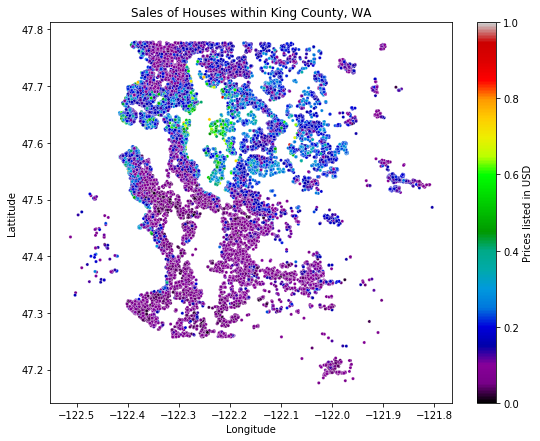

In [26]:
# Scatter plot

plt.figure(figsize = (9,7))
ax = sns.scatterplot(x = df['long'], y = df['lat'], hue = df['price'],
                    palette = 'nipy_spectral', s=10, legend = None , data = df)

norm = plt.Normalize(df['price'].min(0, df['price'].max()))
smap = plt.cm.ScalarMappable(cmap='nipy_spectral',norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'Prices listed in USD')

plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.title('Sales of Houses within King County, WA')
plt.show()

The color bar in the legend represents color prices from lowest to highest, using a scale from 0 to 1.0 - with 0 representing "low prices" and 1.0 representing "high prices".  This is only to depict the concentration of certain prices within an area in King County.  As depicted by the scatterplot above, the concentration of higher house prices lie around 47.6 Lattitude and -122.2 Longitude.  In addition, we observe that in all other places, mostly in the southern region, house prices are lower.  However, this does not provide us with all of the information we need as we need to understand and identify the factors that affect the housing prices.  Initially, we may assume the higher home prices may appear in that specific concentrated areas as they may be near bodies of water - aka Lake Homes - and or located near or in the Eastside (Bellevue, Medina, Kirkland, etc.) and some prominent neighborhoods of Seattle (Leschi, Madrona, Madison Park, etc.)

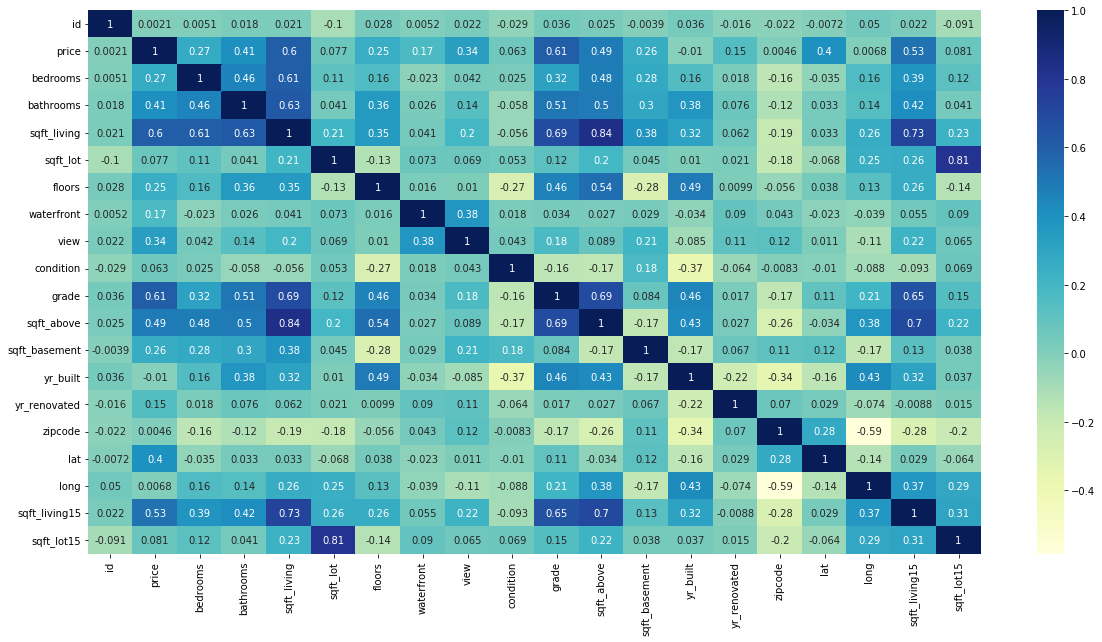

In [27]:
# We will utilize a correlation matrix to find the correlation with each variable

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),cmap = 'YlGnBu',annot=True,ax=ax)

As a preliminary analysis, the top variables that are correlated with the housing prices are:

* sqft_living 
* grade 
* sqft_living15 
* lat - how far north/south a home is located
* number of bathrooms
* view
* floors
* number of bedrooms

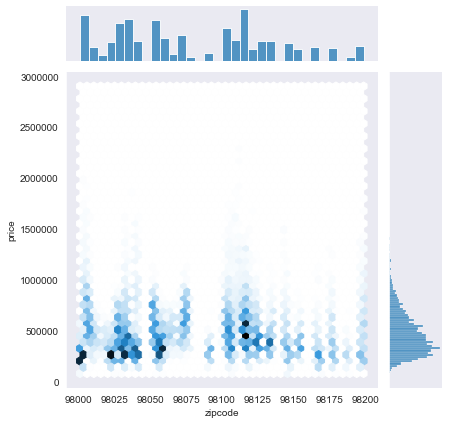

In [29]:
# Taking a look at the highest price by zipcode

sns.set_style("dark")
sns.jointplot(x="zipcode",y="price", data=df, kind='hex')



As depicted from the joint plot above, the most of the housing prices are concentrated around about $500,000, between the ZIP codes of 98000 and 98040 - approximately Renton, WA and Mercer Island, WA.  We can also see a large concentration of higher housing prices within the ZIP codes of 98100 (Tukwila) and 98130 (Seattle). (add more analysis detailing prices of the markets listed above).

[(0, 250000)]

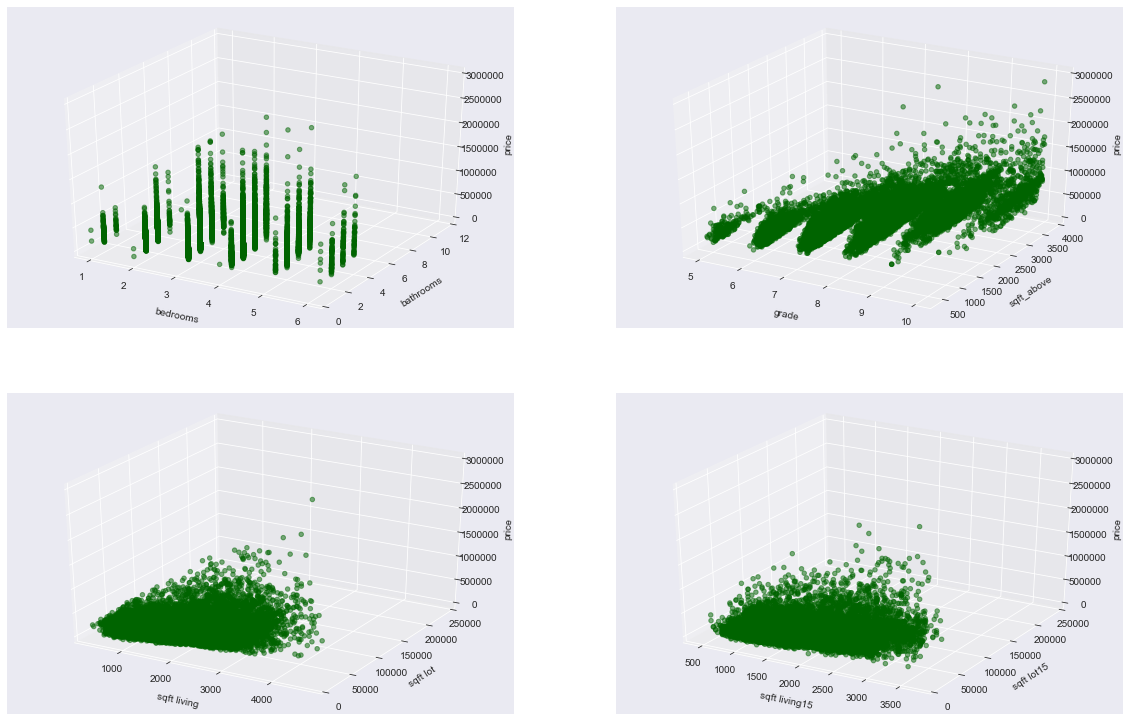

In [31]:
#3d plot
fig=plt.figure(figsize=(20,13))
ax=fig.add_subplot(2,2,1,projection='3d')
ax.scatter(df['bedrooms'],df['bathrooms'],df['price'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nbedrooms',ylabel='\nbathrooms',zlabel='\nprice')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2,projection='3d')
ax.scatter(df['grade'],df['sqft_above'],df['price'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\ngrade',ylabel='\nsqft_above',zlabel='\nprice')
#ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3,projection='3d')
ax.scatter(df['sqft_living'],df['sqft_lot'],df['price'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft living',ylabel='\nsqft lot',zlabel='\nprice')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4,projection='3d')
ax.scatter(df['sqft_living15'],df['sqft_lot15'],df['price'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft living15',ylabel='\nsqft lot15',zlabel='\nprice')
ax.set(ylim=[0,250000])

## Initial Observation

Insert obserations here